<a href="https://colab.research.google.com/github/SuzukiAina/INFO6105-Notebooks/blob/main/info6105_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rqchen","key":"6342708333b6c47e2f7723ec54384ef1"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download bobbyscience/league-of-legends-diamond-ranked-games-10-min

  0% 0.00/539k [00:00<?, ?B/s]
100% 539k/539k [00:00<00:00, 74.0MB/s]


In [ ]:
!unzip league-of-legends-diamond-ranked-games-10-min

Archive:  league-of-legends-diamond-ranked-games-10-min.zip
  inflating: high_diamond_ranked_10min.csv  


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 KB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.1/133.1 KB 4.6 MB/s eta 0:00:00
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=ae435b4c3c572ef45f46bd051c6f310dae689ebd697a7e3fc10106edf3cdb6e0
  Stored in directory: /root/.cache/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 5.7.16 requires jinja2<=3.0.0, but you have jinja2 3.1.2 which is incompatib

In [ ]:
data = pd.read_csv("/content/league-of-legends-diamond-ranked-games-10-min.zip")
data = data[['blueWins','blueTotalExperience','blueTotalGold','blueKills','blueDeaths','blueAssists','redTotalExperience','redTotalGold','redKills','redDeaths','redAssists']]

# What are the data types?
All numeric data

In [ ]:
data.head()

,blueWins,blueTotalExperience,blueTotalGold,blueKills,blueDeaths,blueAssists,redTotalExperience,redTotalGold,redKills,redDeaths,redAssists
0,0,17039,17210,9,6,11,17047,16567,6,9,8
1,0,16265,14712,5,5,5,17438,17620,5,5,2
2,0,16221,16113,7,11,4,17254,17285,11,7,14
3,0,17954,15157,4,5,5,17961,16478,5,4,10
4,0,18543,16400,6,6,6,18313,17404,6,6,7


# Are there missing values?

In [ ]:
data.isnull().sum()

blueWins               0
blueTotalExperience    0
blueTotalGold          0
blueKills              0
blueDeaths             0
blueAssists            0
redTotalExperience     0
redTotalGold           0
redKills               0
redDeaths              0
redAssists             0
dtype: int64

No, there are no missing values

# What are the likely distributions of the numeric variables?

<Figure size 576x360 with 0 Axes>

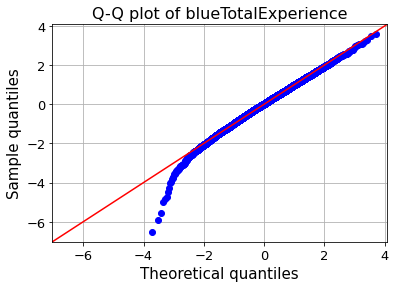

<Figure size 576x360 with 0 Axes>

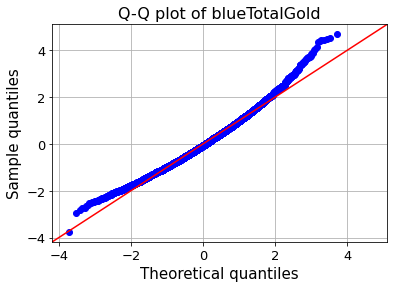

<Figure size 576x360 with 0 Axes>

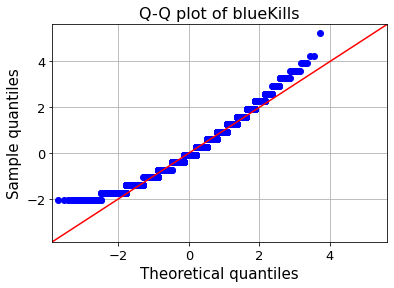

<Figure size 576x360 with 0 Axes>

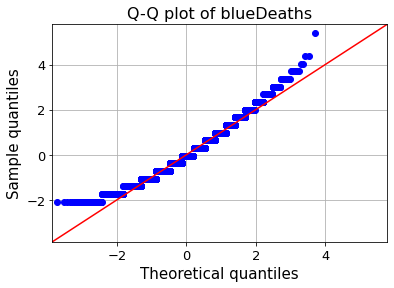

<Figure size 576x360 with 0 Axes>

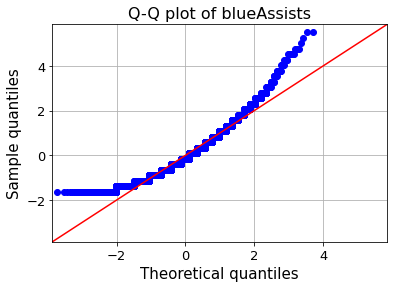

<Figure size 576x360 with 0 Axes>

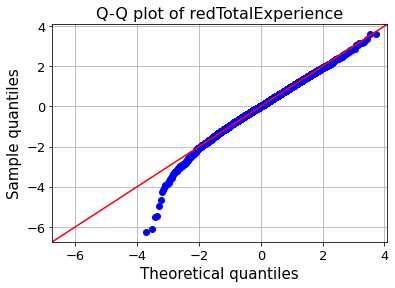

<Figure size 576x360 with 0 Axes>

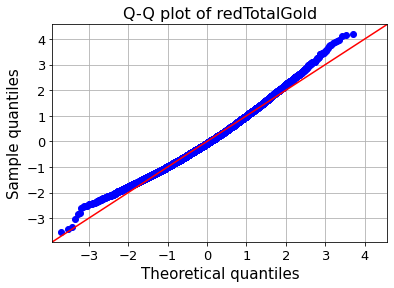

<Figure size 576x360 with 0 Axes>

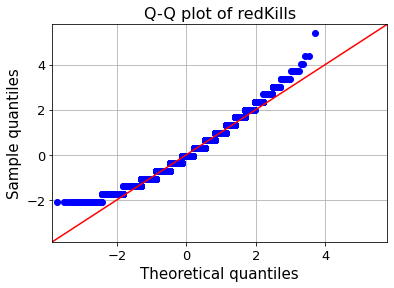

<Figure size 576x360 with 0 Axes>

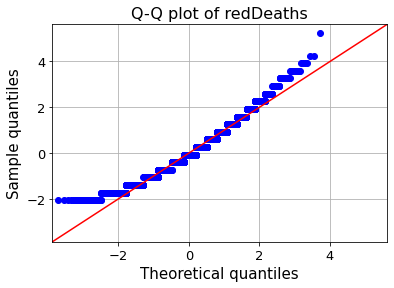

<Figure size 576x360 with 0 Axes>

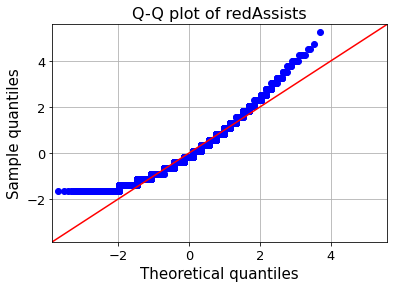

In [ ]:
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['blueTotalExperience','blueTotalGold','blueKills','blueDeaths','blueAssists','redTotalExperience','redTotalGold','redKills','redDeaths','redAssists']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()

*   All data conform to normal distribution
*   Only the data of "total experience" slightly deviates from the normal distribution when the data is small




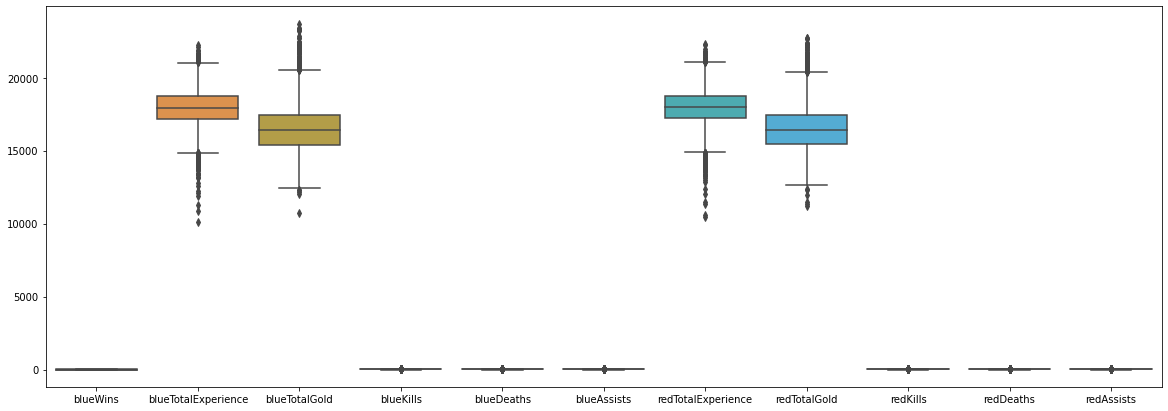

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=data)

In [ ]:
# Normalizing the data in the rings column beacuse the value is too high when compared to other independent variable

from sklearn import preprocessing

# Create x to store scaled values as floats
bExp = data[['blueTotalExperience']].values.astype(float)
bGold = data[['blueTotalGold']].values.astype(float)
rExp = data[['redTotalExperience']].values.astype(float)
rGold = data[['redTotalGold']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
bExp_scaled = min_max_scaler.fit_transform(bExp)
rExp_scaled = min_max_scaler.fit_transform(rExp)
bGold_scaled = min_max_scaler.fit_transform(bGold)
rGold_scaled = min_max_scaler.fit_transform(rGold)


# Run the normalizer on the dataframe
data[['blueTotalExperience']] = pd.DataFrame(bExp_scaled)
data[['redTotalExperience']] = pd.DataFrame(rExp_scaled)
data[['blueTotalGold']] = pd.DataFrame(bGold_scaled)
data[['redTotalGold']] = pd.DataFrame(rGold_scaled)

In [ ]:
data.head()

,blueWins,blueTotalExperience,blueTotalGold,blueKills,blueDeaths,blueAssists,redTotalExperience,redTotalGold,redKills,redDeaths,redAssists
0,0,0.572406,0.499576,9,6,11,0.557608,0.464844,6,9,8
1,0,0.508577,0.306993,5,5,5,0.590732,0.556250,5,5,2
2,0,0.504948,0.415003,7,11,4,0.575144,0.527170,11,7,14
3,0,0.647864,0.341300,4,5,5,0.635039,0.457118,5,4,10
4,0,0.696437,0.437129,6,6,6,0.664859,0.537500,6,6,7


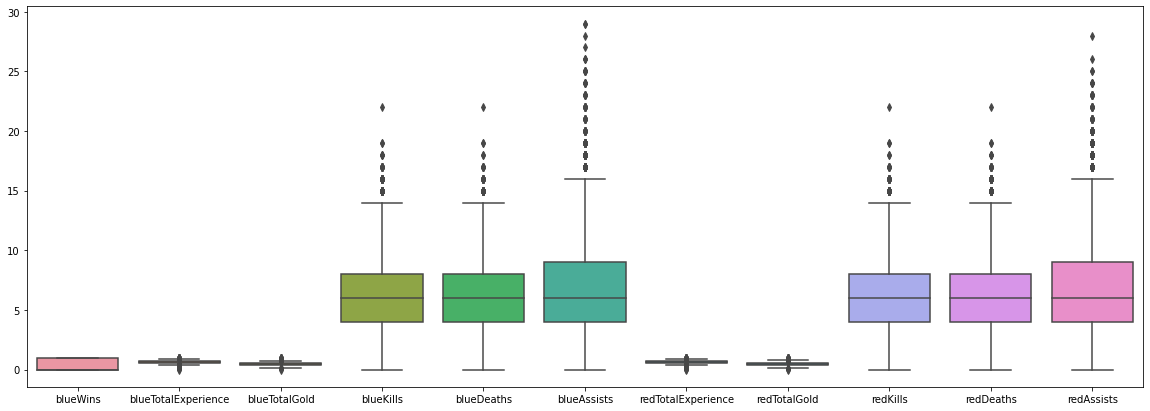

In [ ]:
plt.figure(figsize=(20,7))
sns.boxplot(data=data)

# Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)

In [ ]:
data.corr()

,blueWins,blueTotalExperience,blueTotalGold,blueKills,blueDeaths,blueAssists,redTotalExperience,redTotalGold,redKills,redDeaths,redAssists
blueWins,1.000000,0.396141,0.417213,0.337358,-0.339297,0.276685,-0.387588,-0.411396,-0.339297,0.337358,-0.271047
blueTotalExperience,0.396141,1.000000,0.676193,0.472155,-0.460122,0.303022,-0.281446,-0.485059,-0.460122,0.472155,-0.397254
blueTotalGold,0.417213,0.676193,1.000000,0.888751,-0.162572,0.748352,-0.491268,-0.314212,-0.162572,0.888751,-0.128921
blueKills,0.337358,0.472155,0.888751,1.000000,0.004044,0.813667,-0.462333,-0.161127,0.004044,1.000000,-0.020344
blueDeaths,-0.339297,-0.460122,-0.162572,0.004044,1.000000,-0.026372,0.464584,0.885728,1.000000,0.004044,0.804023
blueAssists,0.276685,0.303022,0.748352,0.813667,-0.026372,1.000000,-0.396652,-0.133948,-0.026372,0.813667,-0.007481
redTotalExperience,-0.387588,-0.281446,-0.491268,-0.462333,0.464584,-0.396652,1.000000,0.669646,0.464584,-0.462333,0.279788
redTotalGold,-0.411396,-0.485059,-0.314212,-0.161127,0.885728,-0.133948,0.669646,1.000000,0.885728,-0.161127,0.736215
redKills,-0.339297,-0.460122,-0.162572,0.004044,1.000000,-0.026372,0.464584,0.885728,1.000000,0.004044,0.804023
redDeaths,0.337358,0.472155,0.888751,1.000000,0.004044,0.813667,-0.462333,-0.161127,0.004044,1.000000,-0.020344


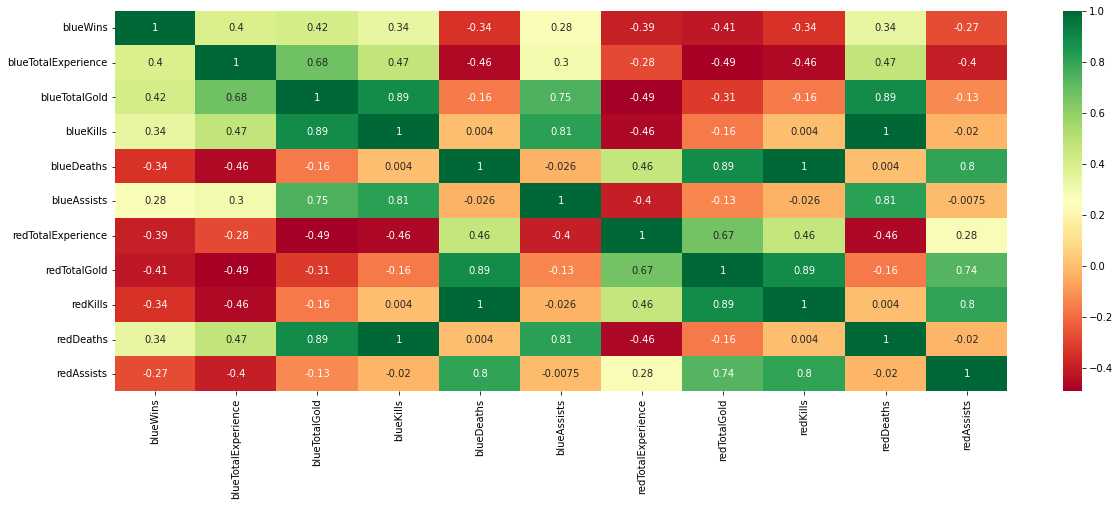

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

From the table or thermodynamic diagram, we can see that all variables play a significant role in predicting which side will win in the end. Most of the values are concentrated around 0.35

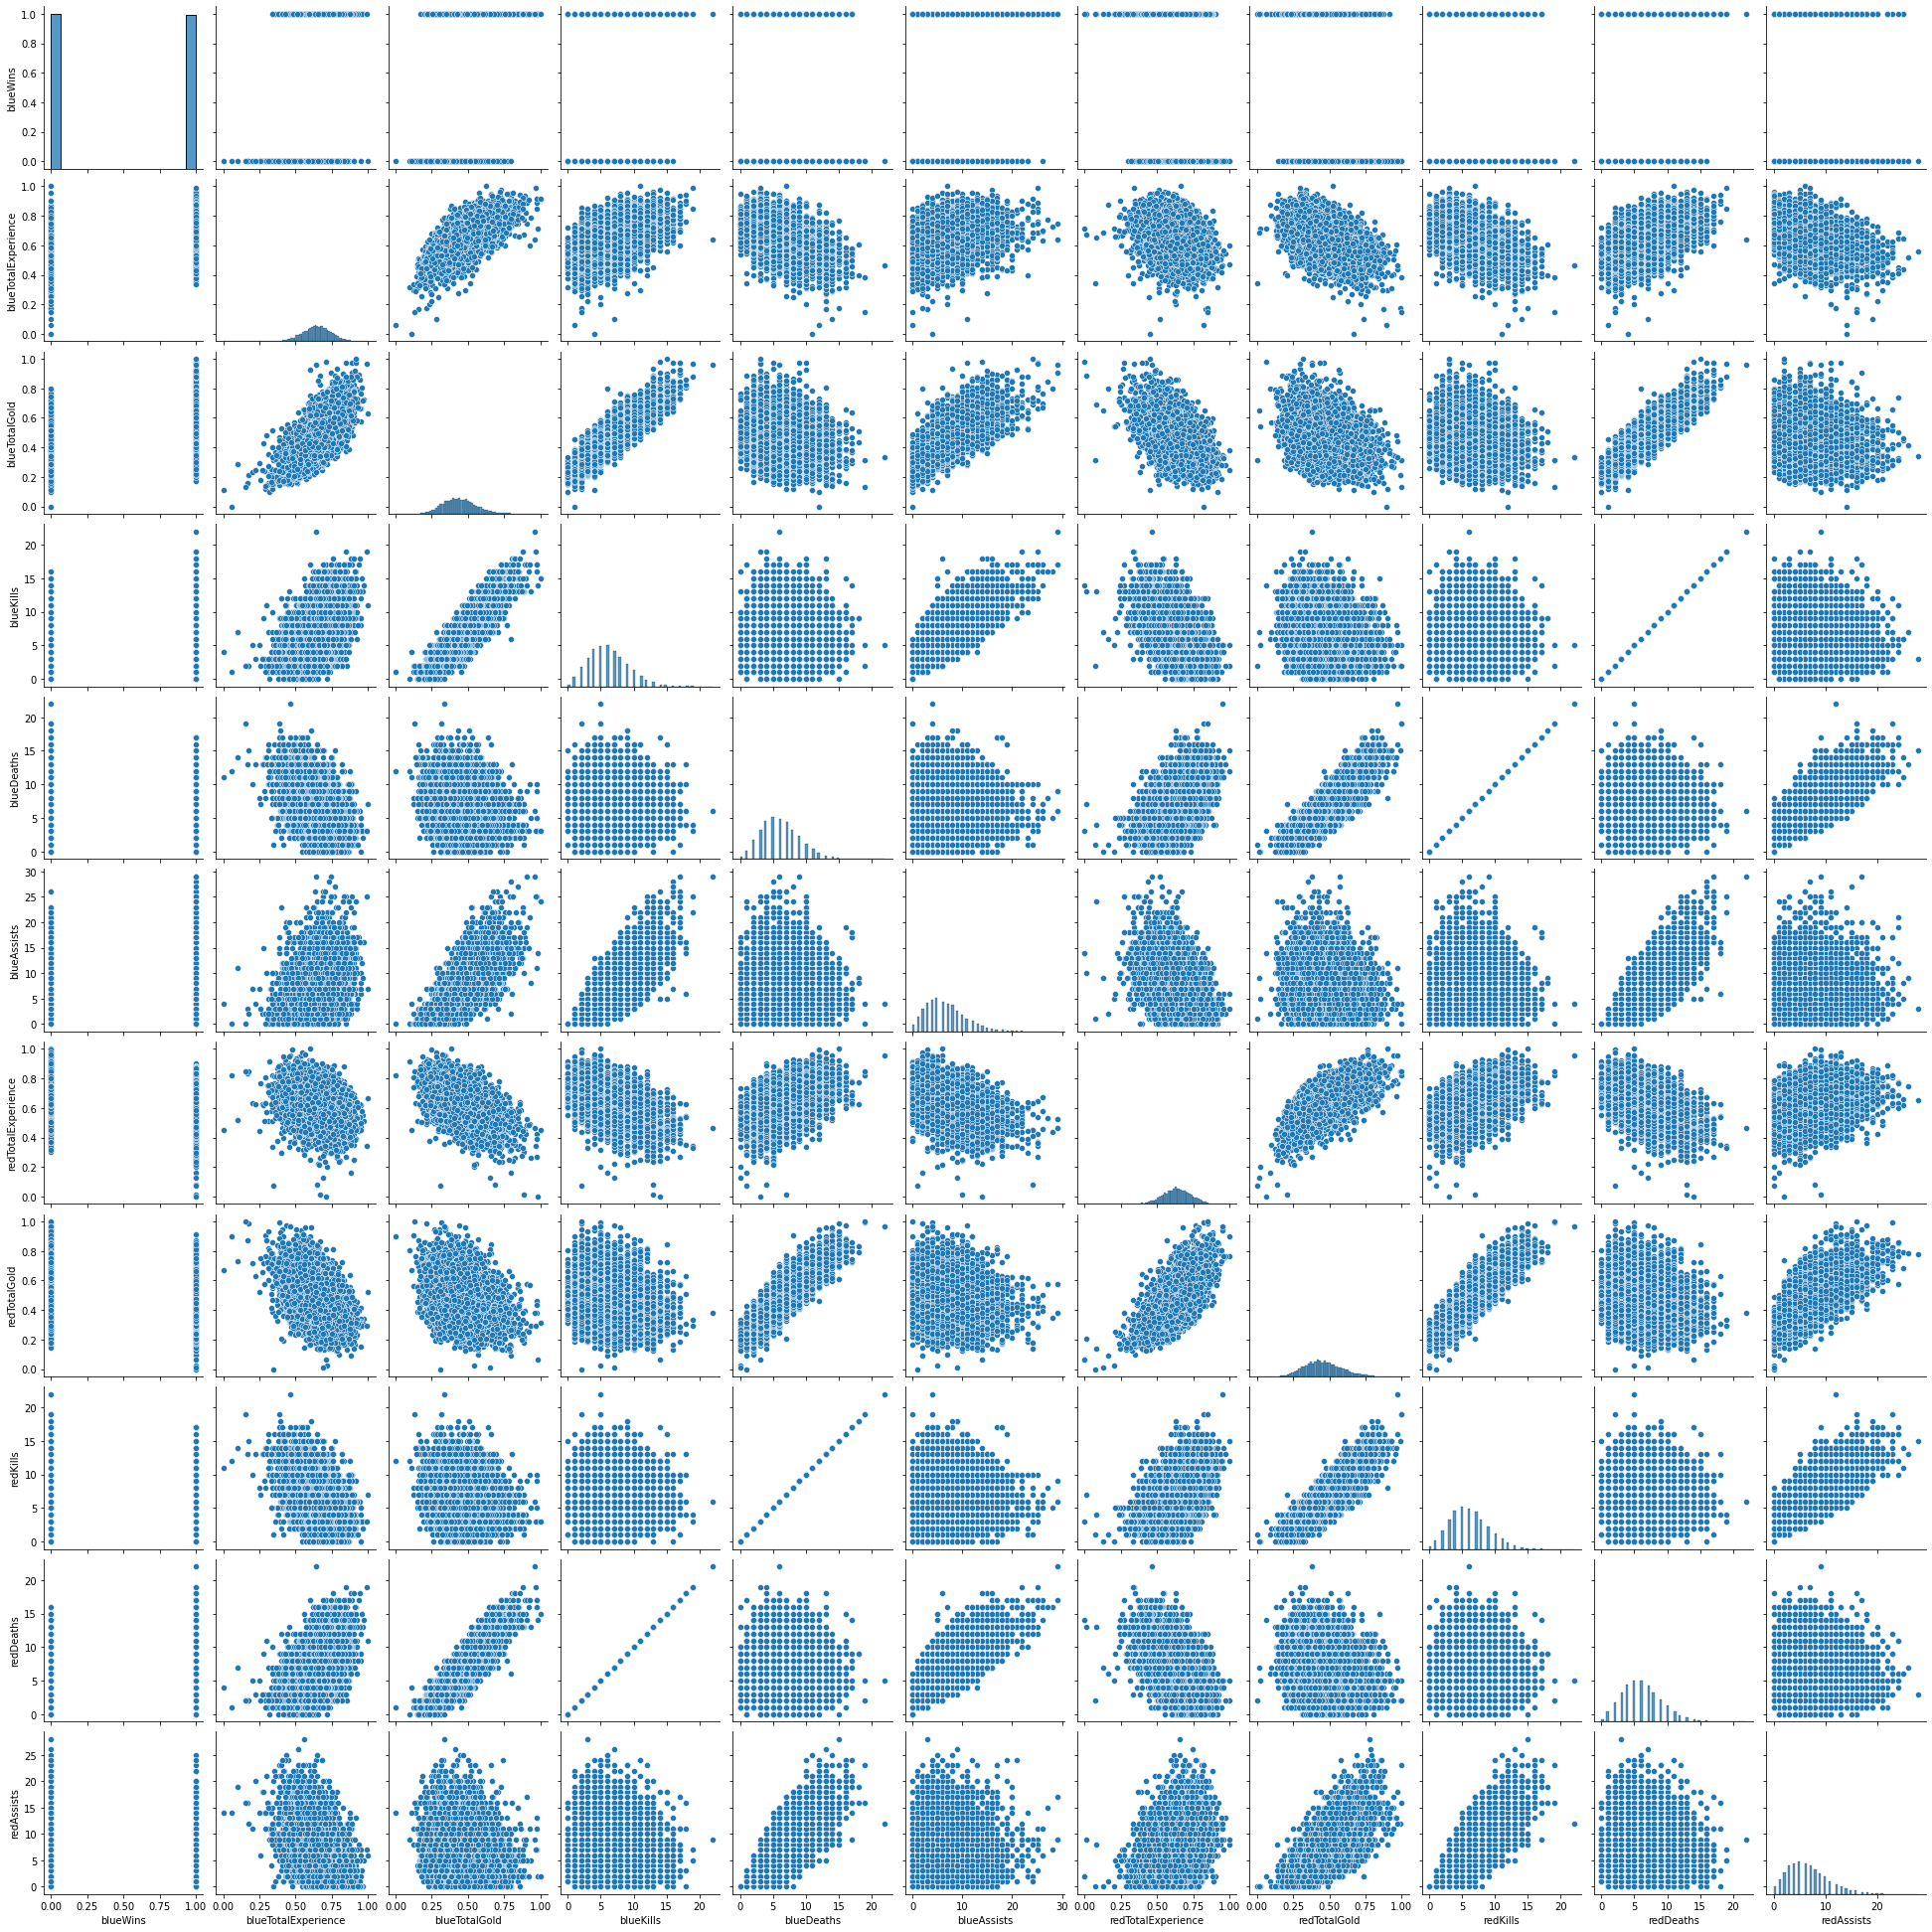

In [ ]:
sns.pairplot(data) 

Correlation matrix and heatmap shows that there is multicollinearity between the independent variables. Red kill and blue death or Blue kill and red death repesents the same value. So we can just choose Blue kills and Blue death and drop Red kills and Red death


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=8)
X = data[ ['blueTotalExperience','blueTotalGold','blueKills','blueDeaths','blueAssists','redTotalExperience','redTotalGold','redKills','redDeaths','redAssists']]
y = data['blueWins']
selector = rfe.fit(X, y)
selector.support_

array([ True,  True,  True, False,  True,  True,  True,  True, False,
        True])

From the REF method, we can see that the number of deaths is relatively unimportant data among these variables, but we can see that it is highly correlated with the results in the thermal diagram, so we keep it

# Building the Model


## Train ,Validation and Test split

In [ ]:
from sklearn.model_selection import  train_test_split

X = data[['blueTotalExperience','blueTotalGold','blueKills','blueDeaths','blueAssists','redTotalExperience','redTotalGold','redAssists']]

y = data['blueWins']


X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

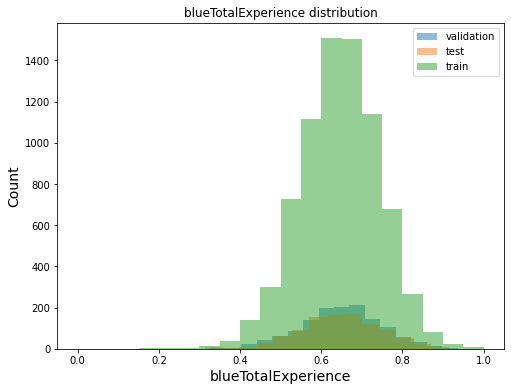

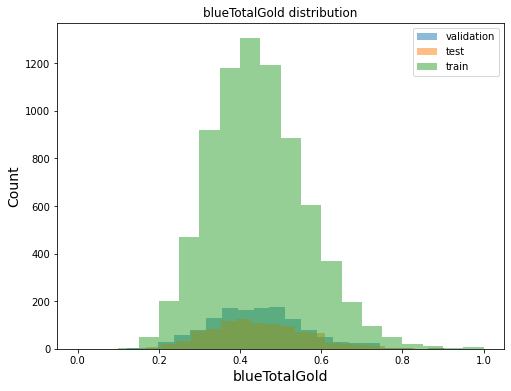

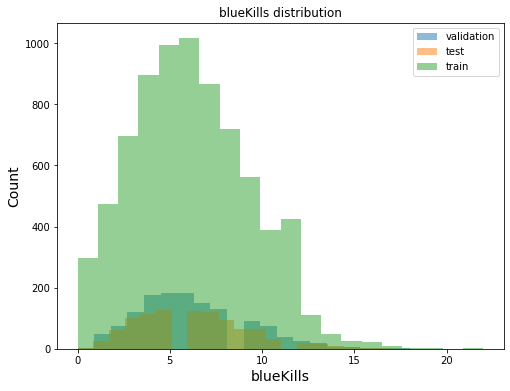

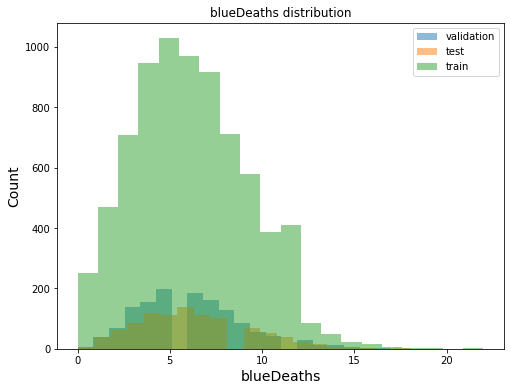

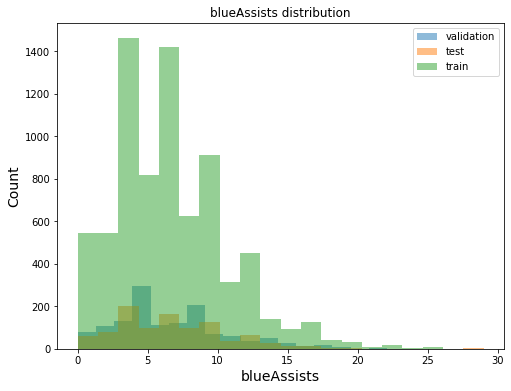

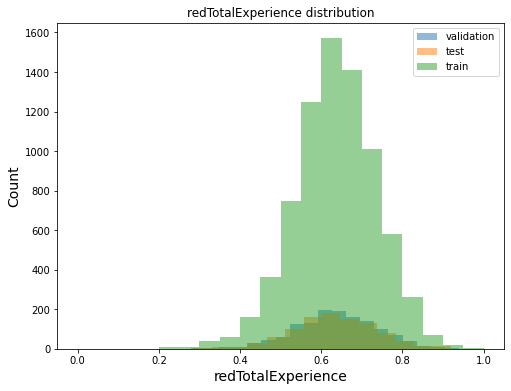

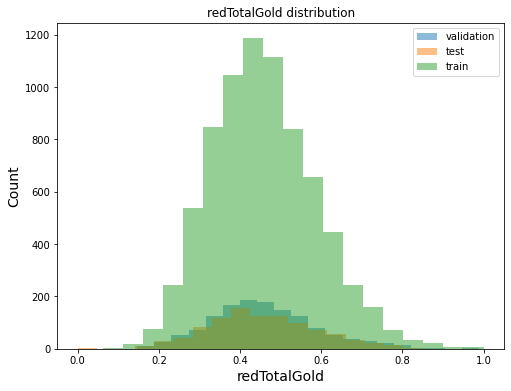

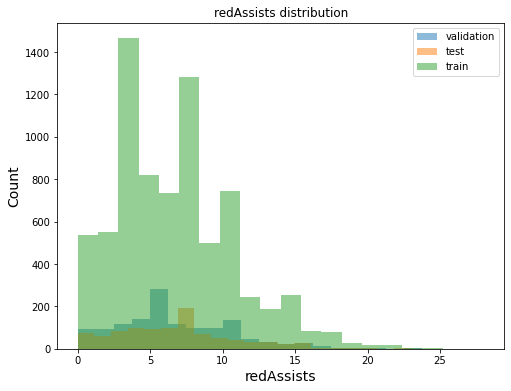

In [ ]:
X_test_plot = X_test[['blueTotalExperience','blueTotalGold','blueKills','blueDeaths','blueAssists','redTotalExperience','redTotalGold','redAssists']]

X_val_plot = X_val[['blueTotalExperience','blueTotalGold','blueKills','blueDeaths','blueAssists','redTotalExperience','redTotalGold','redAssists']]

X_train_plot = X_train[['blueTotalExperience','blueTotalGold','blueKills','blueDeaths','blueAssists','redTotalExperience','redTotalGold','redAssists']]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

In [ ]:
decisionTreeClassifier = DecisionTreeClassifier()
decisionTreeClassifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Make predictions using the training set
y_pred = decisionTreeClassifier.predict(X_train)
confusionMatrix=confusion_matrix(y_train, y_pred)
print('Confusion matrix: \n', confusionMatrix)
score = accuracy_score(y_train,y_pred)
print('Accuracy: %.2f'% score)

Confusion matrix: 
 [[3794    0]
 [   0 3763]]
Accuracy: 1.00


In [ ]:
y_pred = decisionTreeClassifier.predict(X_test)
confusionMatrix=confusion_matrix(y_test, y_pred)
print('Confusion matrix: \n', confusionMatrix)
score = accuracy_score(y_test,y_pred)
print('Accuracy: %.2f'% score)

Confusion matrix: 
 [[302 192]
 [175 319]]
Accuracy: 0.63


In [ ]:
y_pred = decisionTreeClassifier.predict(X_val)
confusionMatrix=confusion_matrix(y_val, y_pred)
print('Confusion matrix: \n', confusionMatrix)
score = accuracy_score(y_val,y_pred)
print('Accuracy: %.2f'% score)

Confusion matrix: 
 [[421 240]
 [248 425]]
Accuracy: 0.63


In [ ]:
#Understanding the important features 
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(decisionTreeClassifier, random_state=5).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0747 ± 0.0161,redTotalGold
0.0512 ± 0.0321,blueTotalGold
0.0348 ± 0.0208,blueDeaths
0.0211 ± 0.0121,redAssists
0.0160 ± 0.0120,redTotalExperience
0.0126 ± 0.0150,blueTotalExperience
0.0071 ± 0.0112,blueKills
-0.0047 ± 0.0084,blueAssists


## Which predictor variables are the most important?


Ranking as following:
1.   redTotalGold
2.   blueTotalGold
3.   blueDeaths
4.   blueKills
5.   redAssist
6.   redTotalExperience
7.   redTotalExperience



## Which independent variables have missing data? How much?

No independent variables have any missing data

## Do the training and test sets have the same data?
Yes, most of the data in the test, training and validation data sets are the same

## In the predictor variables independent of all the other predictor variables?

No, they are not independent of each other. Some variables reperesent the same meaning

## Do the ranges of the predictor variables make sense?


*   Yes, the range of these data is consistent with the state of a game in the first ten minutes. The number of killings is basically below 10, and the economy is around 18000
*   If one party leads in economy, experience and killing, it can lead the team to the final victory


## What are the distributions of the predictor variables?

All data basically conform to normal distribution. Only economy and experience may have a slippery slope, and some values are abnormally low

# Data imputation

## 1% random data remove

### Fill the data with mean

In [ ]:
dataLost=data.copy(deep=True)
for col in dataLost.columns:
  if col!="blueWins":
    dataLost.loc[dataLost.sample(frac=0.01).index, col] = np.nan
dataLost.isnull().sum()

blueWins                0
blueTotalExperience    99
blueTotalGold          99
blueKills              99
blueDeaths             99
blueAssists            99
redTotalExperience     99
redTotalGold           99
redKills               99
redDeaths              99
redAssists             99
dtype: int64

In [ ]:
for (colName,colData) in dataLost.iteritems():
  colData.fillna(colData.mean(), inplace=True)
dataLost.isnull().sum()

blueWins               0
blueTotalExperience    0
blueTotalGold          0
blueKills              0
blueDeaths             0
blueAssists            0
redTotalExperience     0
redTotalGold           0
redKills               0
redDeaths              0
redAssists             0
dtype: int64

In [ ]:
diff=data-dataLost

In [ ]:
diff.std()

blueWins               0.000000
blueTotalExperience    0.010939
blueTotalGold          0.010522
blueKills              0.355361
blueDeaths             0.296402
blueAssists            0.405982
redTotalExperience     0.011326
redTotalGold           0.011899
redKills               0.280778
redDeaths              0.329075
redAssists             0.402322
dtype: float64

In [ ]:
np.mean(diff)

blueWins               0.000000
blueTotalExperience   -0.000147
blueTotalGold         -0.000041
blueKills              0.002024
blueDeaths             0.000856
blueAssists           -0.006019
redTotalExperience    -0.000033
redTotalGold          -0.000191
redKills               0.002390
redDeaths              0.001103
redAssists             0.004238
dtype: float64

### Fill gaps forward or backward

In [ ]:
dataLost=data.copy(deep=True)
for col in dataLost.columns:
  if col!="blueWins":
    dataLost.loc[dataLost.sample(frac=0.01).index, col] = np.nan
dataLost.isnull().sum()

blueWins                0
blueTotalExperience    99
blueTotalGold          99
blueKills              99
blueDeaths             99
blueAssists            99
redTotalExperience     99
redTotalGold           99
redKills               99
redDeaths              99
redAssists             99
dtype: int64

In [ ]:
for (colName,colData) in dataLost.iteritems():
  colData.fillna(colData.mean(), inplace=True)
dataLost.isnull().sum()

blueWins               0
blueTotalExperience    0
blueTotalGold          0
blueKills              0
blueDeaths             0
blueAssists            0
redTotalExperience     0
redTotalGold           0
redKills               0
redDeaths              0
redAssists             0
dtype: int64

In [ ]:
diff=data-dataLost

In [ ]:
diff.std()

blueWins               0.000000
blueTotalExperience    0.012203
blueTotalGold          0.010853
blueKills              0.309572
blueDeaths             0.275386
blueAssists            0.402981
redTotalExperience     0.009963
redTotalGold           0.012603
redKills               0.317656
redDeaths              0.276690
redAssists             0.362382
dtype: float64

In [ ]:
np.mean(diff)

blueWins               0.000000
blueTotalExperience   -0.000151
blueTotalGold          0.000172
blueKills              0.007954
blueDeaths            -0.000371
blueAssists           -0.001213
redTotalExperience     0.000079
redTotalGold          -0.000036
redKills               0.002390
redDeaths              0.001512
redAssists            -0.002203
dtype: float64

### Fill gaps with correspongding win result

In [ ]:
dataLost=data.copy(deep=True)
for col in dataLost.columns:
  if col!="blueWins":
    dataLost.loc[dataLost.sample(frac=0.01).index, col] = np.nan
dataLost.isnull().sum()

blueWins                0
blueTotalExperience    99
blueTotalGold          99
blueKills              99
blueDeaths             99
blueAssists            99
redTotalExperience     99
redTotalGold           99
redKills               99
redDeaths              99
redAssists             99
dtype: int64

In [ ]:
dataBlueWin=dataLost[dataLost.blueWins==1]
dataBlueWinMean=dataBlueWin.mean()
dataRedWin=dataLost[dataLost.blueWins==0]
dataRedWinMean=dataRedWin.mean()

In [ ]:
for (rowName,rowData) in dataLost.iterrows():
  if rowData['blueWins']==0:
    for (colName,colData) in rowData.iteritems():
      if colName!="blueWins" and pd.isna(colData):
        dataLost.at[rowName,colName]=dataBlueWinMean[colName]
  else:
    for (colName,colData) in rowData.iteritems():
      if colName!="redWins" and pd.isna(colData):
        dataLost.at[rowName,colName]=dataRedWinMean[colName]
dataLost.isnull().sum()

blueWins               0
blueTotalExperience    0
blueTotalGold          0
blueKills              0
blueDeaths             0
blueAssists            0
redTotalExperience     0
redTotalGold           0
redKills               0
redDeaths              0
redAssists             0
dtype: int64

In [ ]:
diff=data-dataLost

In [ ]:
diff.std()

blueWins               0.000000
blueTotalExperience    0.011889
blueTotalGold          0.016421
blueKills              0.384712
blueDeaths             0.287718
blueAssists            0.462606
redTotalExperience     0.012560
redTotalGold           0.015831
redKills               0.310630
redDeaths              0.345168
redAssists             0.448354
dtype: float64

In [ ]:
np.mean(diff)

blueWins               0.000000
blueTotalExperience    0.000067
blueTotalGold         -0.000058
blueKills              0.002715
blueDeaths             0.001063
blueAssists            0.003272
redTotalExperience     0.000026
redTotalGold          -0.000066
redKills              -0.006864
redDeaths             -0.003009
redAssists            -0.001381
dtype: float64

## 5% random data remove

### Fill the data with mean

In [ ]:
dataLost=data.copy(deep=True)
for col in dataLost.columns:
  if col!="blueWins":
    dataLost.loc[dataLost.sample(frac=0.05).index, col] = np.nan
dataLost.isnull().sum()

blueWins                 0
blueTotalExperience    494
blueTotalGold          494
blueKills              494
blueDeaths             494
blueAssists            494
redTotalExperience     494
redTotalGold           494
redKills               494
redDeaths              494
redAssists             494
dtype: int64

In [ ]:
for (colName,colData) in dataLost.iteritems():
  colData.fillna(colData.mean(), inplace=True)
dataLost.isnull().sum()

blueWins               0
blueTotalExperience    0
blueTotalGold          0
blueKills              0
blueDeaths             0
blueAssists            0
redTotalExperience     0
redTotalGold           0
redKills               0
redDeaths              0
redAssists             0
dtype: int64

In [ ]:
diff=data-dataLost

In [ ]:
diff.std()

blueWins               0.000000
blueTotalExperience    0.022343
blueTotalGold          0.025545
blueKills              0.638563
blueDeaths             0.621468
blueAssists            0.895511
redTotalExperience     0.023039
redTotalGold           0.028716
redKills               0.648073
redDeaths              0.706997
redAssists             0.946828
dtype: float64

In [ ]:
np.mean(diff)

blueWins               0.000000
blueTotalExperience    0.000391
blueTotalGold         -0.000246
blueKills             -0.008935
blueDeaths            -0.005861
blueAssists            0.004296
redTotalExperience     0.000257
redTotalGold           0.000027
redKills              -0.002345
redDeaths              0.005236
redAssists            -0.008000
dtype: float64

### Fill gaps forward or backward

In [ ]:
dataLost=data.copy(deep=True)
for col in dataLost.columns:
  if col!="blueWins":
    dataLost.loc[dataLost.sample(frac=0.05).index, col] = np.nan
dataLost.isnull().sum()

blueWins                 0
blueTotalExperience    494
blueTotalGold          494
blueKills              494
blueDeaths             494
blueAssists            494
redTotalExperience     494
redTotalGold           494
redKills               494
redDeaths              494
redAssists             494
dtype: int64

In [ ]:
for (colName,colData) in dataLost.iteritems():
  colData.fillna(colData.mean(), inplace=True)
dataLost.isnull().sum()

blueWins               0
blueTotalExperience    0
blueTotalGold          0
blueKills              0
blueDeaths             0
blueAssists            0
redTotalExperience     0
redTotalGold           0
redKills               0
redDeaths              0
redAssists             0
dtype: int64

In [ ]:
diff=data-dataLost

In [ ]:
diff.std()

blueWins               0.000000
blueTotalExperience    0.022742
blueTotalGold          0.027515
blueKills              0.683788
blueDeaths             0.664450
blueAssists            0.947168
redTotalExperience     0.021643
redTotalGold           0.029124
redKills               0.690662
redDeaths              0.661357
redAssists             0.992362
dtype: float64

In [ ]:
np.mean(diff)

blueWins               0.000000
blueTotalExperience    0.000153
blueTotalGold          0.000104
blueKills              0.006089
blueDeaths            -0.001706
blueAssists           -0.008810
redTotalExperience     0.000160
redTotalGold          -0.000131
redKills              -0.010549
redDeaths              0.001081
redAssists             0.013310
dtype: float64

### Fill gaps with correspongding win result

In [ ]:
dataLost=data.copy(deep=True)
for col in dataLost.columns:
  if col!="blueWins":
    dataLost.loc[dataLost.sample(frac=0.05).index, col] = np.nan
dataLost.isnull().sum()

blueWins                 0
blueTotalExperience    494
blueTotalGold          494
blueKills              494
blueDeaths             494
blueAssists            494
redTotalExperience     494
redTotalGold           494
redKills               494
redDeaths              494
redAssists             494
dtype: int64

In [ ]:
dataBlueWin=dataLost[dataLost.blueWins==1]
dataBlueWinMean=dataBlueWin.mean()
dataRedWin=dataLost[dataLost.blueWins==0]
dataRedWinMean=dataRedWin.mean()

In [ ]:
for (rowName,rowData) in dataLost.iterrows():
  if rowData['blueWins']==0:
    for (colName,colData) in rowData.iteritems():
      if colName!="blueWins" and pd.isna(colData):
        dataLost.at[rowName,colName]=dataBlueWinMean[colName]
  else:
    for (colName,colData) in rowData.iteritems():
      if colName!="redWins" and pd.isna(colData):
        dataLost.at[rowName,colName]=dataRedWinMean[colName]
dataLost.isnull().sum()

blueWins               0
blueTotalExperience    0
blueTotalGold          0
blueKills              0
blueDeaths             0
blueAssists            0
redTotalExperience     0
redTotalGold           0
redKills               0
redDeaths              0
redAssists             0
dtype: int64

In [ ]:
diff=data-dataLost

In [ ]:
diff.std()

blueWins               0.000000
blueTotalExperience    0.027537
blueTotalGold          0.033451
blueKills              0.774421
blueDeaths             0.762850
blueAssists            1.014332
redTotalExperience     0.026012
redTotalGold           0.036742
redKills               0.737434
redDeaths              0.787843
redAssists             0.983329
dtype: float64

In [ ]:
np.mean(diff)

blueWins               0.000000
blueTotalExperience    0.000446
blueTotalGold          0.000502
blueKills              0.000316
blueDeaths             0.008012
blueAssists            0.007560
redTotalExperience    -0.000035
redTotalGold           0.000030
redKills              -0.018096
redDeaths              0.012574
redAssists            -0.010852
dtype: float64

## 10% random data remove

### Fill the data with mean

In [ ]:
dataLost=data.copy(deep=True)
for col in dataLost.columns:
  if col!="blueWins":
    dataLost.loc[dataLost.sample(frac=0.1).index, col] = np.nan
dataLost.isnull().sum()

blueWins                 0
blueTotalExperience    988
blueTotalGold          988
blueKills              988
blueDeaths             988
blueAssists            988
redTotalExperience     988
redTotalGold           988
redKills               988
redDeaths              988
redAssists             988
dtype: int64

In [ ]:
for (colName,colData) in dataLost.iteritems():
  colData.fillna(colData.mean(), inplace=True)
dataLost.isnull().sum()

blueWins               0
blueTotalExperience    0
blueTotalGold          0
blueKills              0
blueDeaths             0
blueAssists            0
redTotalExperience     0
redTotalGold           0
redKills               0
redDeaths              0
redAssists             0
dtype: int64

In [ ]:
diff=data-dataLost

In [ ]:
diff.std()

blueWins               0.000000
blueTotalExperience    0.031407
blueTotalGold          0.037498
blueKills              0.905730
blueDeaths             0.924525
blueAssists            1.215365
redTotalExperience     0.031540
redTotalGold           0.039448
redKills               0.915093
redDeaths              0.950859
redAssists             1.259955
dtype: float64

In [ ]:
np.mean(diff)

blueWins               0.000000
blueTotalExperience    0.000274
blueTotalGold          0.000026
blueKills             -0.007729
blueDeaths            -0.004388
blueAssists           -0.035470
redTotalExperience     0.000273
redTotalGold          -0.000856
redKills              -0.009674
redDeaths             -0.001655
redAssists            -0.016552
dtype: float64

### Fill gaps forward or backward

In [ ]:
dataLost=data.copy(deep=True)
for col in dataLost.columns:
  if col!="blueWins":
    dataLost.loc[dataLost.sample(frac=0.1).index, col] = np.nan
dataLost.isnull().sum()

blueWins                 0
blueTotalExperience    988
blueTotalGold          988
blueKills              988
blueDeaths             988
blueAssists            988
redTotalExperience     988
redTotalGold           988
redKills               988
redDeaths              988
redAssists             988
dtype: int64

In [ ]:
for (colName,colData) in dataLost.iteritems():
  colData.fillna(colData.mean(), inplace=True)
dataLost.isnull().sum()

blueWins               0
blueTotalExperience    0
blueTotalGold          0
blueKills              0
blueDeaths             0
blueAssists            0
redTotalExperience     0
redTotalGold           0
redKills               0
redDeaths              0
redAssists             0
dtype: int64

In [ ]:
diff=data-dataLost

In [ ]:
diff.std()

blueWins               0.000000
blueTotalExperience    0.030979
blueTotalGold          0.036272
blueKills              0.936423
blueDeaths             0.905636
blueAssists            1.359333
redTotalExperience     0.030465
redTotalGold           0.043467
redKills               0.946043
redDeaths              0.966019
redAssists             1.292817
dtype: float64

In [ ]:
np.mean(diff)

blueWins               0.000000
blueTotalExperience    0.000209
blueTotalGold          0.000150
blueKills             -0.005817
blueDeaths             0.004385
blueAssists            0.029202
redTotalExperience    -0.000502
redTotalGold           0.000520
redKills               0.003935
redDeaths              0.001381
redAssists             0.022026
dtype: float64

### Fill gaps with correspongding win result

In [ ]:
dataLost=data.copy(deep=True)
for col in dataLost.columns:
  if col!="blueWins":
    dataLost.loc[dataLost.sample(frac=0.1).index, col] = np.nan
dataLost.isnull().sum()

blueWins                 0
blueTotalExperience    988
blueTotalGold          988
blueKills              988
blueDeaths             988
blueAssists            988
redTotalExperience     988
redTotalGold           988
redKills               988
redDeaths              988
redAssists             988
dtype: int64

In [ ]:
dataBlueWin=dataLost[dataLost.blueWins==1]
dataBlueWinMean=dataBlueWin.mean()
dataRedWin=dataLost[dataLost.blueWins==0]
dataRedWinMean=dataRedWin.mean()

In [ ]:
for (rowName,rowData) in dataLost.iterrows():
  if rowData['blueWins']==0:
    for (colName,colData) in rowData.iteritems():
      if colName!="blueWins" and pd.isna(colData):
        dataLost.at[rowName,colName]=dataBlueWinMean[colName]
  else:
    for (colName,colData) in rowData.iteritems():
      if colName!="redWins" and pd.isna(colData):
        dataLost.at[rowName,colName]=dataRedWinMean[colName]
dataLost.isnull().sum()

blueWins               0
blueTotalExperience    0
blueTotalGold          0
blueKills              0
blueDeaths             0
blueAssists            0
redTotalExperience     0
redTotalGold           0
redKills               0
redDeaths              0
redAssists             0
dtype: int64

In [ ]:
diff=data-dataLost

In [ ]:
diff.std()

blueWins               0.000000
blueTotalExperience    0.038270
blueTotalGold          0.047191
blueKills              1.101802
blueDeaths             1.078774
blueAssists            1.421959
redTotalExperience     0.038666
redTotalGold           0.049751
redKills               1.067197
redDeaths              1.104018
redAssists             1.412743
dtype: float64

In [ ]:
np.mean(diff)

blueWins               0.000000
blueTotalExperience   -0.000106
blueTotalGold          0.000121
blueKills              0.005026
blueDeaths             0.000954
blueAssists           -0.003705
redTotalExperience     0.000127
redTotalGold           0.000146
redKills              -0.013238
redDeaths             -0.007118
redAssists             0.036041
dtype: float64

*Authors*
Renqiu Chen


License text below

 -----


All code in this note is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license.  https://creativecommons.org/licenses/by/3.0/us/

These licenses let others distribute, remix, tweak, and build upon the work, even commercially, as long as they give credit for the original creation.

Copyright 2021 AI Skunks

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.